# Datojen haku ja esikäsittely

In [1]:
import os
apppath = 'areadata'

if os.path.exists(apppath):
    if os.getcwd() != apppath:
        os.chdir(apppath)
path = os.getcwd()
path = os.path.join(path, "data")

if not os.path.exists(path):
    os.mkdir(path)


In [2]:
from read_and_prepare_data import read_and_prepare_data
stat, post, kunta_stat, vaalidata = read_and_prepare_data(path)

read_and_prepare_data  read from start
read_post_muncipalities  read from file
read_stats_postcode  read from file
read_ravintolat_ja_kaupat  read from file
read_kiinteisto  read from file
read_vaalit  read from file


In [3]:
def display_factorial_planes(data, X, n_comp, axis_ranks, labels=None, alpha=1):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    from sklearn.decomposition import PCA
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np 

    # Create a PCA model to reduce our data to 2 dimensions for visualisation
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    # Transfor the scaled data to the new PCA space
    X_reduced = pca.transform(X)
    illustrative_var=data['cluster']

    # Convert to a data frame
    X_reduceddf = pd.DataFrame(X_reduced, index=data['Postinumero'])
    X_reduceddf['cluster'] = data['cluster']
    centres_reduced = pca.transform(kmeans.cluster_centers_)

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter( X_reduced[:, d1],  X_reduced[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected_data = np.where(illustrative_var == value)
                    plt.scatter(X_reduced[selected_data, d1], X_reduced[selected_data, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate( X_reduced[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='10', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs( X_reduced[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1], marker='x', s=300, linewidths=5,c='r', zorder=10)
            plt.show()
   


In [138]:
stat.columns.to_list()

['Postinumero',
 'A Maatalous, metsätalous ja kalatalous, 2017 (TP)',
 'Aikuisten taloudet, 2018 (TE)',
 'Alemman korkeakoulututkinnon suorittaneet, 2018 (KO)',
 'Alimpaan tuloluokkaan kuuluvat taloudet, 2017 (TR)',
 'Alkutuotannon työpaikat, 2017 (TP)',
 'Ammatillisen tutkinnon suorittaneet, 2018 (KO)',
 'Asukkaat yhteensä, 2018 (HE)',
 'Asumisväljyys, 2018 (TE)',
 'Asuntojen keskipinta-ala, 2018 (RA)',
 'B Kaivostoiminta ja louhinta, 2017 (TP)',
 'C Teollisuus, 2017 (TP)',
 'D Sähkö-, kaasu- ja lämpöhuolto, jäähdytysliiketoiminta, 2017 (TP)',
 'E Vesihuolto, viemäri- ja jätevesihuolto ja muu ympäristön puhtaanapito, 2017 (TP)',
 'Eläkeläiset, 2017 (PT)',
 'Eläkeläisten taloudet, 2018 (TE)',
 'F Rakentaminen, 2017 (TP)',
 'G Tukku- ja vähittäiskauppa; moottoriajoneuvojen ja moottoripyörien korjaus, 2017 (TP)',
 'H Kuljetus ja varastointi, 2017 (TP)',
 'I Majoitus- ja ravitsemistoiminta, 2017 (TP)',
 'J Informaatio ja viestintä, 2017 (TP)',
 'Jalostuksen työpaikat, 2017 (TP)',
 'K Raho

In [139]:
start = stat.columns.get_loc('A Maatalous, metsätalous ja kalatalous, 2017 (TP) osuudesta asukkaat')
end = stat.columns.get_loc('Postinumeroalueen pinta-ala osuus area_code')
col_selected = stat.iloc[:,start:end].columns.to_list()

In [140]:


col_puolueet = ['Ääniosuus KD',
     'Ääniosuus KESK',
     'Ääniosuus KOK',
     'Ääniosuus PS',
     'Ääniosuus RKP',
     'Ääniosuus SDP',
     'Ääniosuus VAS',
     'Ääniosuus VIHR',
     'Äänestysosuus']
col_selected = col_selected + col_puolueet

In [128]:
col_selected = ['Aikuisten taloudet, 2018 (TE) osuudesta taloudet',
 '4.1.C Autoetu Yhteensä Saajien lukumäärä osuudesta verotetut osuus total',
 '4.2.10 Muut veronalaiset sosiaalietuudet Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Alkutuotannon työpaikat, 2017 (TP) osuudesta asukkaat',
 'Pientaloasunnot, 2018 (RA) osuudesta asukkaat osuus total',
 'Asuntolainan korkomenot vs tulot yhteensä',
 'Alimpaan tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet osuus total',
 'Vuokra-asunnoissa asuvat taloudet, 2018 (TE) osuudesta taloudet',
 '4.2.9 Kuntoutusraha ja -avustus Yhteensä Summa, euroa osuus total',
 'Eläkeläisten taloudet, 2018 (TE) osuudesta taloudet osuus total',
 'Nuorten yksinasuvien taloudet, 2018 (TE) osuudesta taloudet osuus total',
 '4.2.8 Lapsen kotihoidon tuki Yhteensä Saajien lukumäärä osuudesta verotetut',
 '4.2 Työmatkakulujen perusteella palkkatulosta vähennettävä määrä (TVL 93 §) Yhteensä Summa, euroa osuus total',
 'Miehet, 2018 (HE) osuudesta asukkaat osuus total',
 'Perusasteen suorittaneet, 2018 (KO) osuudesta asukkaat',
 'Kerrostaloasunnot, 2018 (RA) osuudesta asukkaat',
 'Keskimmäiseen tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet osuus total',
 'Omistusasunnoissa asuvat taloudet, 2018 (TE) osuudesta taloudet osuus total',
 'Asumisväljyys, 2018 (TE) osuudesta asukkaat',
 'Talotyypit yhteensä 2019 Neliöhinta (EUR/m2) osuus total',
 'Lapsitaloudet, 2018 (TE) osuudesta taloudet osuus total',
 'G Tukku- ja vähittäiskauppa; moottoriajoneuvojen ja moottoripyörien korjaus, 2017 (TP) osuudesta asukkaat',
 'Asuntojen keskipinta-ala, 2018 (RA) osuus total',
 '14.12 Opintolainavähennys Yhteensä Saajien lukumäärä osuudesta verotetut osuus total',
 'Verojen osuus',
 '4.2.7 Päivä- ja äitiyspäivärahat Yhteensä Saajien lukumäärä osuudesta verotetut',
 '1.1.3 Kirkollisvero Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Lapsettomat nuorten parien taloudet, 2018 (TE) osuudesta taloudet',
 'E Vesihuolto, viemäri- ja jätevesihuolto ja muu ympäristön puhtaanapito, 2017 (TP) osuudesta asukkaat osuus total',
 'Alemman korkeakoulututkinnon suorittaneet, 2018 (KO) osuudesta asukkaat osuus total',
 'Asumistiheys',
 '5. Pääomatulot yhteensä Yhteensä Saajien lukumäärä osuudesta verotetut',
 '6. Osingot brutto Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Ylimpään tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet osuus total',
 'Ravintolat osuudesta asukkaat',
 'Ylemmän korkeakoulututkinnon suorittaneet, 2018 (KO) osuudesta asukkaat osuus total',
 'Naiset, 2018 (HE) osuudesta asukkaat osuus total',
 '11. Yrittäjätulot yhteensä Yhteensä Summa, euroa osuus total',
 'Ammatillisen tutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat osuus total',
 '4.1 Palkkatulot yhteensä Yhteensä Saajien lukumäärä osuudesta verotetut',
 '4. Ansiotuloista tehtävät luonnolliset vähennykset eli tulonhankkimiskulut yhteensä Yhteensä Summa, euroa osuus total',
 'Ylioppilastutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat osuus total',
 'H Kuljetus ja varastointi, 2017 (TP) osuudesta asukkaat',
 'Opiskelijat, 2017 (PT) osuudesta asukkaat osuus total',
 'A Maatalous, metsätalous ja kalatalous, 2017 (TP) osuudesta asukkaat osuus total',
 '4.2.2 Työttömyysetuudet Yhteensä Summa, euroa osuus total',
 '14.7 Kotitalousvähennys Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Vähenykset suhteessa tulot yhteensä',
 '5.1.3 Vuokratulo Yhteensä Saajien lukumäärä osuudesta verotetut osuus total',
 '4.2.6 Tapaturma- ym. muut päivärahat Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Työttömät, 2017 (PT) osuudesta asukkaat',
 'L Kiinteistöalan toiminta, 2017 (TP) osuudesta asukkaat',
 'B Kaivostoiminta ja louhinta, 2017 (TP) osuudesta asukkaat',
 'Q Terveys- ja sosiaalipalvelut, 2017 (TP) osuudesta asukkaat',
 'C Teollisuus, 2017 (TP) osuudesta asukkaat osuus total',
 'J Informaatio ja viestintä, 2017 (TP) osuudesta asukkaat',
 'K Rahoitus- ja vakuutustoiminta, 2017 (TP) osuudesta asukkaat osuus total',
 'Keskiverot',
 'Palveluiden työpaikat, 2017 (TP) osuudesta asukkaat osuus total',
 '1.1 Tuloverot yhteensä Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Myymälät osuudesta asukkaat',
 'T Kotitalouksien toiminta työnantajina; kotitalouksien eriyttämätön toiminta tavaroiden ja palveluiden tuottamiseksi omaan käyttöön, 2017 (TP) osuudesta asukkaat osuus total',
 'Palveluiden työpaikat, 2017 (TP) osuudesta asukkaat',
 'R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat',
 '2. Tulot yhteensä Yhteensä Summa, euroa osuus total',
 'D Sähkö-, kaasu- ja lämpöhuolto, jäähdytysliiketoiminta, 2017 (TP) osuudesta asukkaat',
 'F Rakentaminen, 2017 (TP) osuudesta asukkaat osuus total',
 'Jalostuksen työpaikat, 2017 (TP) osuudesta asukkaat',
 'I Majoitus- ja ravitsemistoiminta, 2017 (TP) osuudesta asukkaat osuus total']

In [123]:
col_selected = [
 'A Maatalous, metsätalous ja kalatalous, 2017 (TP) osuudesta asukkaat',
 'Alemman korkeakoulututkinnon suorittaneet, 2018 (KO) osuudesta asukkaat',
 'Ammatillisen tutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat',
 'B Kaivostoiminta ja louhinta, 2017 (TP) osuudesta asukkaat',
 'C Teollisuus, 2017 (TP) osuudesta asukkaat',
 'D Sähkö-, kaasu- ja lämpöhuolto, jäähdytysliiketoiminta, 2017 (TP) osuudesta asukkaat',
 'E Vesihuolto, viemäri- ja jätevesihuolto ja muu ympäristön puhtaanapito, 2017 (TP) osuudesta asukkaat',
 'F Rakentaminen, 2017 (TP) osuudesta asukkaat',
 'G Tukku- ja vähittäiskauppa; moottoriajoneuvojen ja moottoripyörien korjaus, 2017 (TP) osuudesta asukkaat',
 'H Kuljetus ja varastointi, 2017 (TP) osuudesta asukkaat',
 'I Majoitus- ja ravitsemistoiminta, 2017 (TP) osuudesta asukkaat',
 'J Informaatio ja viestintä, 2017 (TP) osuudesta asukkaat',
 'K Rahoitus- ja vakuutustoiminta, 2017 (TP) osuudesta asukkaat',
 'Kerrostaloasunnot, 2018 (RA) osuudesta asukkaat',
 'L Kiinteistöalan toiminta, 2017 (TP) osuudesta asukkaat',
 'Miehet, 2018 (HE) osuudesta asukkaat',
 'Naiset, 2018 (HE) osuudesta asukkaat',
 'Opiskelijat, 2017 (PT) osuudesta asukkaat',
 'Perusasteen suorittaneet, 2018 (KO) osuudesta asukkaat',
 'Pientaloasunnot, 2018 (RA) osuudesta asukkaat',
 'Q Terveys- ja sosiaalipalvelut, 2017 (TP) osuudesta asukkaat',
 'R Taiteet, viihde ja virkistys, 2017 (TP) osuudesta asukkaat',
 'S Muu palvelutoiminta, 2017 (TP) osuudesta asukkaat',
 'T Kotitalouksien toiminta työnantajina; kotitalouksien eriyttämätön toiminta tavaroiden ja palveluiden tuottamiseksi omaan käyttöön, 2017 (TP) osuudesta asukkaat',
 'Työttömät, 2017 (PT) osuudesta asukkaat',
 'Ylemmän korkeakoulututkinnon suorittaneet, 2018 (KO) osuudesta asukkaat',
 'Ylioppilastutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat',
 'Ravintolat osuudesta asukkaat',
 'Myymälät osuudesta asukkaat',
 'Aikuisten taloudet, 2018 (TE) osuudesta taloudet',
 'Alimpaan tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet',
 'Eläkeläisten taloudet, 2018 (TE) osuudesta taloudet',
 'Keskimmäiseen tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet',
 'Lapsettomat nuorten parien taloudet, 2018 (TE) osuudesta taloudet',
 'Lapsitaloudet, 2018 (TE) osuudesta taloudet',
 'Nuorten yksinasuvien taloudet, 2018 (TE) osuudesta taloudet',
 'Omistusasunnoissa asuvat taloudet, 2018 (TE) osuudesta taloudet',
 'Vuokra-asunnoissa asuvat taloudet, 2018 (TE) osuudesta taloudet',
 'Ylimpään tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet',
'1.1.3 Kirkollisvero Yhteensä Saajien lukumäärä osuudesta verotetut',
 '11. Yrittäjätulot yhteensä Yhteensä Saajien lukumäärä osuudesta verotetut',
 '11.5.1.1 Asuntolainan korkomenot (TVL 58 § 2 mom.) Yhteensä Saajien lukumäärä osuudesta verotetut',
 '14.12 Opintolainavähennys Yhteensä Saajien lukumäärä osuudesta verotetut',
 '14.7 Kotitalousvähennys Yhteensä Saajien lukumäärä osuudesta verotetut',
'4.1.C Autoetu Yhteensä Saajien lukumäärä osuudesta verotetut',
'4.2.10 Muut veronalaiset sosiaalietuudet Yhteensä Saajien lukumäärä osuudesta verotetut',
 '4.2.2 Työttömyysetuudet Yhteensä Saajien lukumäärä osuudesta verotetut',
 '4.2.6 Tapaturma- ym. muut päivärahat Yhteensä Saajien lukumäärä osuudesta verotetut',
 '4.2.7 Päivä- ja äitiyspäivärahat Yhteensä Saajien lukumäärä osuudesta verotetut',
 '4.2.8 Lapsen kotihoidon tuki Yhteensä Saajien lukumäärä osuudesta verotetut',
 '4.2.9 Kuntoutusraha ja -avustus Yhteensä Saajien lukumäärä osuudesta verotetut',
 '5.1.3 Vuokratulo Yhteensä Saajien lukumäärä osuudesta verotetut',
 'Asuntojen keskipinta-ala, 2018 (RA) osuus total',
 'Talotyypit yhteensä 2019 Neliöhinta (EUR/m2) osuus total',
 'Asumisväljyys, 2018 (TE) osuus total',
 '11. Yrittäjätulot yhteensä Yhteensä Summa, euroa osuus total',
 '14.12 Opintolainavähennys Yhteensä Summa, euroa osuus total',
 '14.7 Kotitalousvähennys Yhteensä Summa, euroa osuus total',
 '2. Tulot yhteensä Yhteensä Summa, euroa osuus total',
 'Verojen osuus',
 'Vähenykset suhteessa tulot yhteensä',
 'Pääomatulojen osuus',
 'Asuntolainan korkomenot vs tulot yhteensä',
 'Asumistiheys',
 'Postinumeroalueen pinta-ala osuus area_code']


In [31]:

col_puolueet = ['Ääniosuus KD',
     'Ääniosuus KESK',
     'Ääniosuus KOK',
     'Ääniosuus PS',
     'Ääniosuus RKP',
     'Ääniosuus SDP',
     'Ääniosuus VAS',
     'Ääniosuus VIHR',
     'Äänestysosuus']
col_selected = col_selected + col_puolueet

In [59]:
from sklearn.feature_selection import  mutual_info_classif
import pandas as pd

from draw_and_create_clusters import  prepare_cluster_data, create_kmeans_clusters 
from create_prediction import select_kbest
from select_columns_and_clean_data import select_columns_and_clean_data

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_colwidth = 100

#selected = stat[stat['area_code']=='FI1B1'].copy()
#selected_vaalidata = vaalidata[vaalidata['area_code']=='FI1B1']
#post_included = post[post['area_code']=='FI1B1'].copy()

#selected = stat[(stat['muncipality_code']==91)].copy()
#selected_vaalidata = vaalidata[(vaalidata['Kuntanumero']==91)].copy()
#post_included = post[post['muncipality_code']==91]['postcode'].count()

selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()

kbest_score_func = mutual_info_classif
k_selected = 'all'
RMR_type='MIQ'
n_clusters=6
k_selected = 'all'
outlier_fraction = 0.003
scaled=False

numeric_features = col_selected
categorical_features=['language_code']

kmeans, X, X_scale, data, selected_cols, features_df, outliers = select_columns_and_clean_data(
    selected,
    numeric_features,
    categorical_features,
    outlier_fraction = outlier_fraction,
    kbest_score_func = mutual_info_classif,
    k_selected = 'all',
    RMR_type='MIQ',
    n_clusters=6,
    scaled=scaled)

Number of clusters: 6 Silhouette Coefficient: 0.653 Calinski Harabaz Index: 6049


KeyboardInterrupt: 

Number of clusters: 7 Silhouette Coefficient: 0.163 Calinski Harabaz Index: 335
5    1173
0     886
1     431
4     334
6     160
2       2
3       1
Name: cluster, dtype: int64


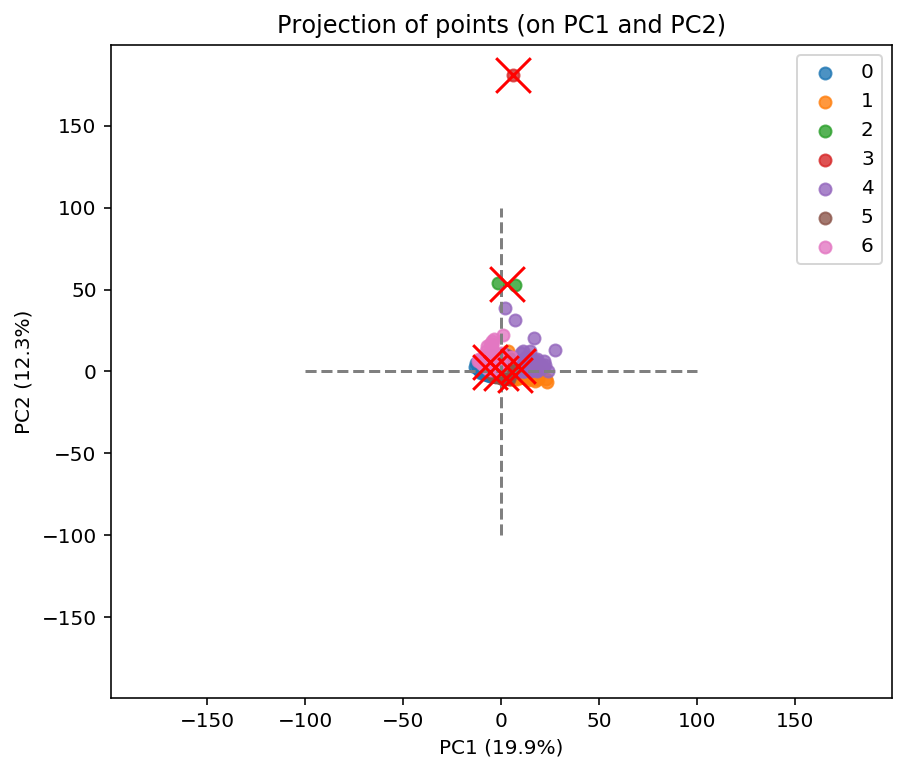

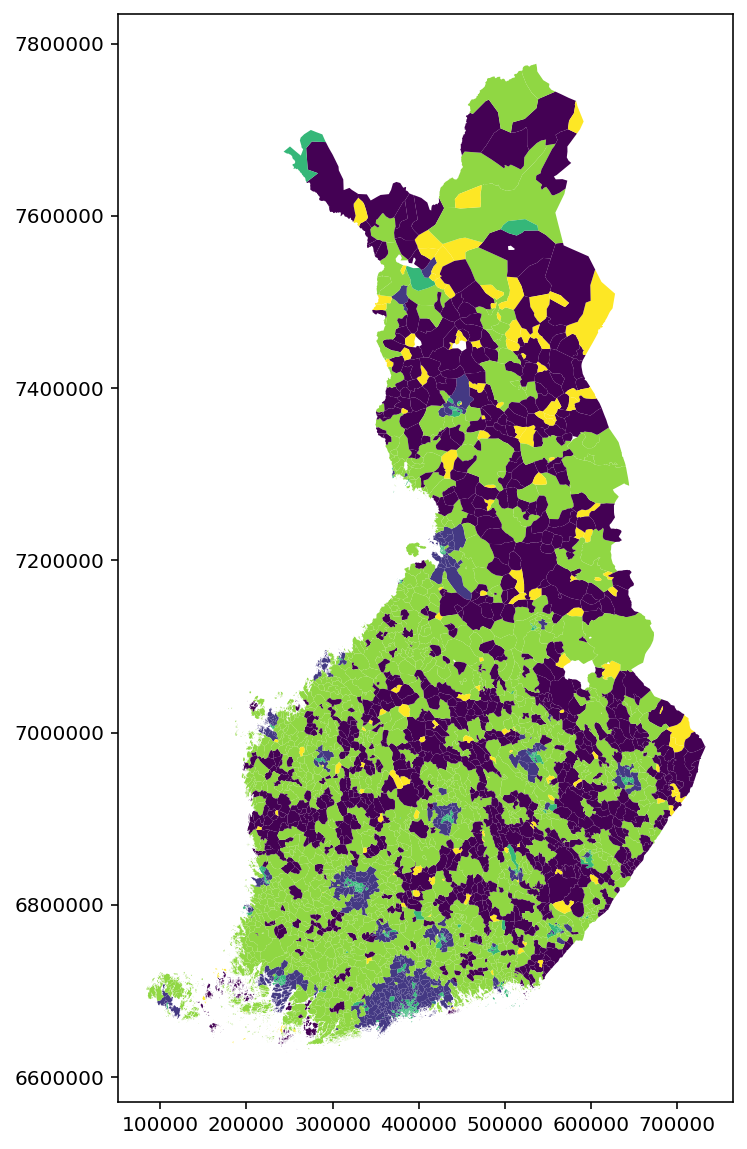

In [143]:
from draw_and_create_clusters import  prepare_cluster_data, create_kmeans_clusters 
from create_prediction import select_kbest
from pyod.models.knn import KNN

numeric_features = col_selected
categorical_features=['language_code']

selected = stat.copy()
selected_vaalidata = vaalidata.copy()
post_included = post.copy()

selected=selected[selected['Postinumero']!='96320']
selected=selected[selected['Postinumero']!='70210']
selected=selected[selected['Postinumero']!='06850']
selected=selected[selected['Postinumero']!='01720']
selected=selected[selected['Postinumero']!='00290']
selected=selected[selected['Postinumero']!='01530']
selected=selected[selected['Postinumero']!='99670']
selected=selected[selected['Postinumero']!='00880']
selected=selected[selected['Postinumero']!='88120']
selected=selected[selected['Postinumero']!='90620']
selected=selected[selected['Postinumero']!='99670']
selected=selected[selected['Postinumero']!='01740']
selected=selected[selected['Postinumero']!='33380']
selected=selected[selected['Postinumero']!='57120']
selected=selected[selected['Postinumero']!='97145']
selected=selected[selected['Postinumero']!='96930']
selected=selected[selected['Postinumero']!='91670']



X, X_scale, data = prepare_cluster_data(selected, numeric_features, categorical_features)


X = X.loc[data.index]
X_scale= X_scale.loc[data.index]
n_components = 2
n_clusters = 7

kmeans, data = create_kmeans_clusters(data, X_scale, n_clusters, silhouette_print=0)
print(data['cluster'].value_counts())
display_factorial_planes(data, X_scale, n_components, axis_ranks, labels=None, alpha=alpha)
data.plot(column='cluster', figsize=(10, 10))


In [149]:
data[data['cluster']==4]

0       52.0
1       11.0
2        6.0
3        9.0
4        4.0
        ... 
2841     3.0
2848     0.0
2914     5.0
3008     2.0
3010     6.0
Name: Ravintolat, Length: 334, dtype: float64

In [57]:

for col_num in range(n_clusters + 1, len(selected_cols), 1):
    features = [element for idx, element in enumerate(selected_cols) if idx < col_num]
    print(col_num)
    X_copy = X[features].copy()
    kmeans, data = create_kmeans_clusters(data, X_copy, n_clusters, silhouette_print=0)
    print(data['cluster'].value_counts())
    print()

7
Number of clusters: 6 Silhouette Coefficient: 0.934 Calinski Harabaz Index: 20205
0    2556
4     225
1     109
3      53
2      25
5      10
Name: cluster, dtype: int64

8
Number of clusters: 6 Silhouette Coefficient: 0.934 Calinski Harabaz Index: 20204
1    2556
0     225
5     109
3      53
2      25
4      10
Name: cluster, dtype: int64

9
Number of clusters: 6 Silhouette Coefficient: 0.934 Calinski Harabaz Index: 20199
0    2556
2     225
4     109
1      53
3      25
5      10
Name: cluster, dtype: int64

10
Number of clusters: 6 Silhouette Coefficient: 0.934 Calinski Harabaz Index: 20196
1    2556
0     225
4     109
2      53
5      25
3      10
Name: cluster, dtype: int64

11
Number of clusters: 6 Silhouette Coefficient: 0.933 Calinski Harabaz Index: 19912
0    2556
4     225
2     109
3      53
1      25
5      10
Name: cluster, dtype: int64

12
Number of clusters: 6 Silhouette Coefficient: 0.933 Calinski Harabaz Index: 19901
0    2556
3     225
1     109
5      53
4      2

KeyboardInterrupt: 

In [39]:
print(data['cluster'].value_counts())

0    2551
4     227
1     112
3      57
5      21
2      10
Name: cluster, dtype: int64


In [52]:
stat.columns.to_list()

['Postinumero',
 'A Maatalous, metsätalous ja kalatalous, 2017 (TP)',
 'Aikuisten taloudet, 2018 (TE)',
 'Alemman korkeakoulututkinnon suorittaneet, 2018 (KO)',
 'Alimpaan tuloluokkaan kuuluvat taloudet, 2017 (TR)',
 'Alkutuotannon työpaikat, 2017 (TP)',
 'Ammatillisen tutkinnon suorittaneet, 2018 (KO)',
 'Asukkaat yhteensä, 2018 (HE)',
 'Asumisväljyys, 2018 (TE)',
 'Asuntojen keskipinta-ala, 2018 (RA)',
 'B Kaivostoiminta ja louhinta, 2017 (TP)',
 'C Teollisuus, 2017 (TP)',
 'D Sähkö-, kaasu- ja lämpöhuolto, jäähdytysliiketoiminta, 2017 (TP)',
 'E Vesihuolto, viemäri- ja jätevesihuolto ja muu ympäristön puhtaanapito, 2017 (TP)',
 'Eläkeläiset, 2017 (PT)',
 'Eläkeläisten taloudet, 2018 (TE)',
 'F Rakentaminen, 2017 (TP)',
 'G Tukku- ja vähittäiskauppa; moottoriajoneuvojen ja moottoripyörien korjaus, 2017 (TP)',
 'H Kuljetus ja varastointi, 2017 (TP)',
 'I Majoitus- ja ravitsemistoiminta, 2017 (TP)',
 'J Informaatio ja viestintä, 2017 (TP)',
 'Jalostuksen työpaikat, 2017 (TP)',
 'K Raho

In [54]:
stat[['1.1 Tuloverot yhteensä Yhteensä Summa, euroa osuus total',
 '1.1.3 Kirkollisvero Yhteensä Summa, euroa osuus total',
 '11. Yrittäjätulot yhteensä Yhteensä Summa, euroa osuus total',
 '14.12 Opintolainavähennys Yhteensä Summa, euroa osuus total',
 '14.7 Kotitalousvähennys Yhteensä Summa, euroa osuus total',
 '2. Tulot yhteensä Yhteensä Summa, euroa osuus total','Verojen osuus',
 'Vähenykset suhteessa tulot yhteensä',
 'Pääomatulojen osuus',
 'Asuntolainan korkomenot vs tulot yhteensä',
]]

,"1.1 Tuloverot yhteensä Yhteensä Summa, euroa osuus total","1.1.3 Kirkollisvero Yhteensä Summa, euroa osuus total","11. Yrittäjätulot yhteensä Yhteensä Summa, euroa osuus total","11.5.1.1 Asuntolainan korkomenot (TVL 58 § 2 mom.) Yhteensä Summa, euroa osuus total","14.12 Opintolainavähennys Yhteensä Summa, euroa osuus total","14.7 Kotitalousvähennys Yhteensä Summa, euroa osuus total","2. Tulot yhteensä Yhteensä Summa, euroa osuus total",Verojen osuus,Vähenykset suhteessa tulot yhteensä,Pääomatulojen osuus,Asuntolainan korkomenot vs tulot yhteensä
0,2.387037,1.094445,1.039967,1.233557,4.463052,1.679543,1.827687,0.272831,0.013815,0.255523,0.003517
1,2.361967,1.116930,1.381772,1.775287,3.882373,1.906625,1.833949,0.269044,0.013586,0.231248,0.005044
2,3.603943,1.333660,2.126960,2.458228,4.696646,2.490337,2.652740,0.283805,0.010159,0.365380,0.004829
3,3.187323,1.290676,1.181140,1.899608,4.455629,2.599224,2.416823,0.275498,0.009713,0.370543,0.004096
4,2.407081,0.993484,1.196253,1.523194,4.873441,1.595081,1.889586,0.266110,0.012924,0.310732,0.004200
...,...,...,...,...,...,...,...,...,...,...,...
3015,0.515160,0.964246,1.461841,0.832958,0.000000,0.673385,0.703150,0.153049,0.048937,0.054166,0.006173
3016,0.519592,0.000000,0.000000,0.707769,0.000000,0.000000,0.664810,0.163268,0.055226,0.000000,0.005547
3017,0.778628,1.193933,2.251996,0.883985,0.000000,0.000000,0.862656,0.188551,0.033563,0.079117,0.005340
3018,0.869933,1.125296,1.726623,0.581460,0.000000,0.490605,0.893784,0.203324,0.030054,0.099399,0.003390


from pyod.models.knn import KNN


outlier_fraction = 0.003
knn_outlier = KNN(n_neighbors=n_clusters, contamination=outlier_fraction)
knn_outlier.fit(X)

# get the prediction labels and outlier scores of the training data
y_train_knn_pred = knn_outlier.labels_  # y_test_pred labels (0: inliers, 1: outliers)
y_train_knn_scores = knn_outlier.decision_scores_  # raw outlier scores

data['outlier']=y_train_knn_pred
data['outlier_score']=y_train_knn_scores


data = data[data['outlier']==0]
X = X.loc[data.index]
X_scale= X_scale.loc[data.index]

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs1 = SFS(kmeans, 
           k_features=len(X_scale.columns), 
           forward=True, 
           floating=False, 
           verbose=1,
           cv=4,
           n_jobs=-1
           scoring='accuracy')

sfs1 = sfs1.fit(X_scale, data['cluster'], custom_feature_names=X.columns)
sfs1_df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

features_max = sfs1_df[sfs1_df['avg_score']==sfs1_df['avg_score'].max()]['feature_names'].values[0]
result = []
for x in features_max:
    result.append(x)
X_scale = X_scale[result]
kmeans, data = create_kmeans_clusters(data, X_scale, n_clusters, silhouette_print=0)

fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Number of clusters: 10 Silhouette Coefficient: 0.873 Calinski Harabaz Index: 13186


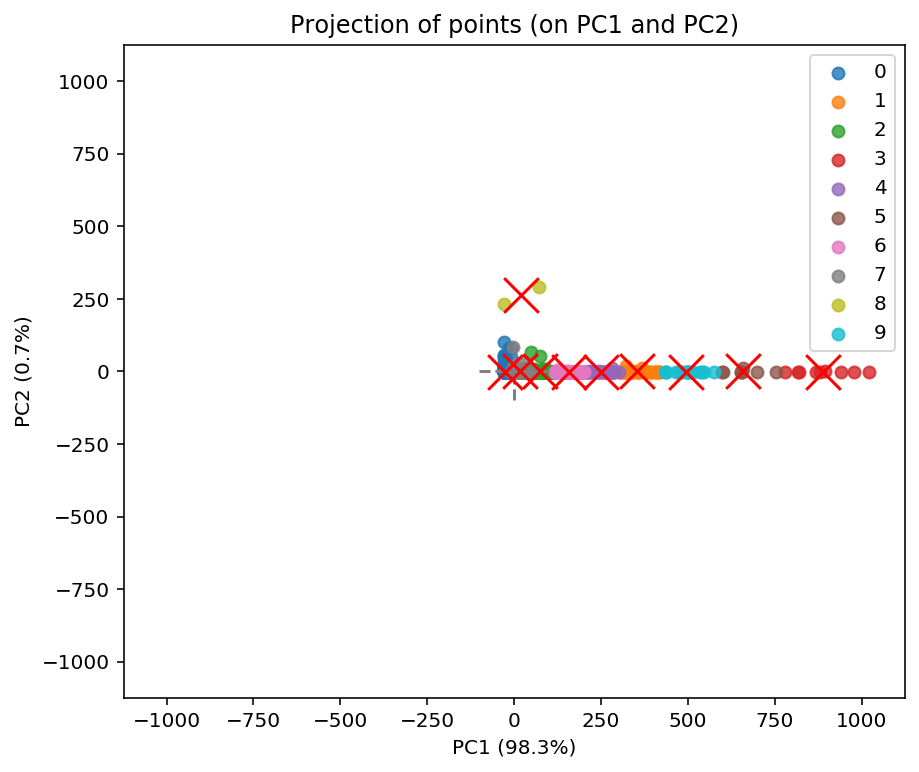

Number of clusters: 9 Silhouette Coefficient: 0.894 Calinski Harabaz Index: 13085


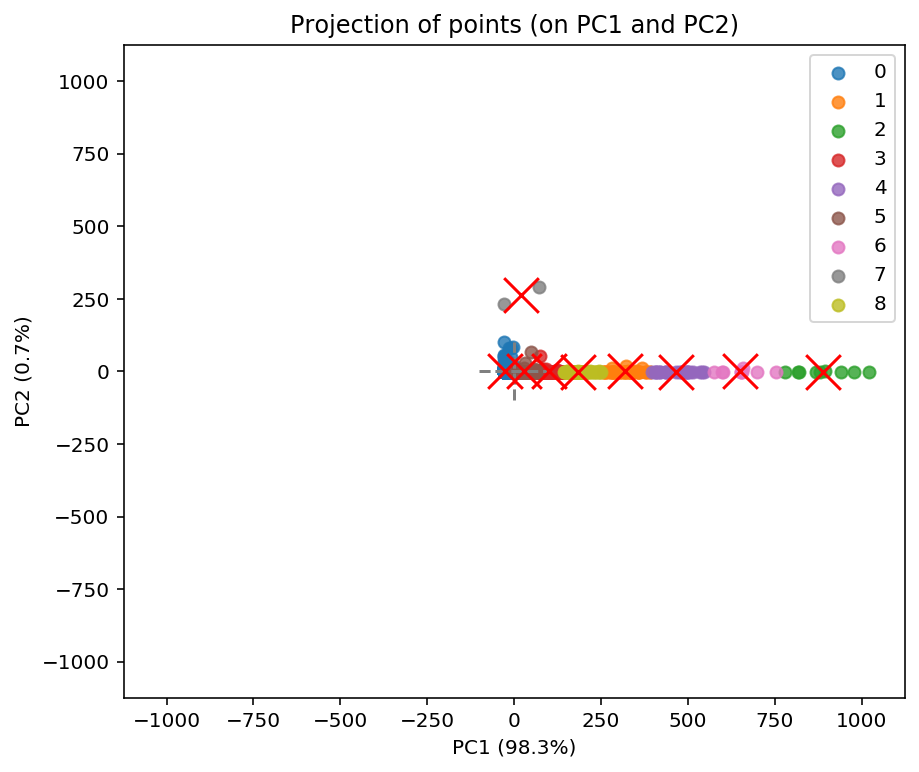

Number of clusters: 8 Silhouette Coefficient: 0.894 Calinski Harabaz Index: 12776


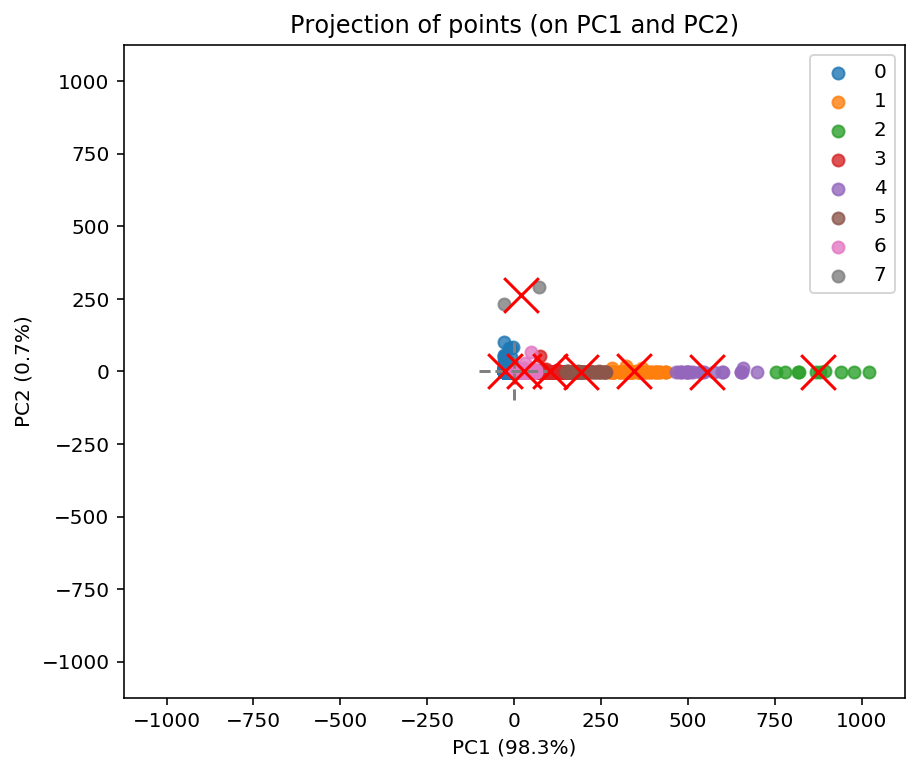

Number of clusters: 7 Silhouette Coefficient: 0.884 Calinski Harabaz Index: 12858


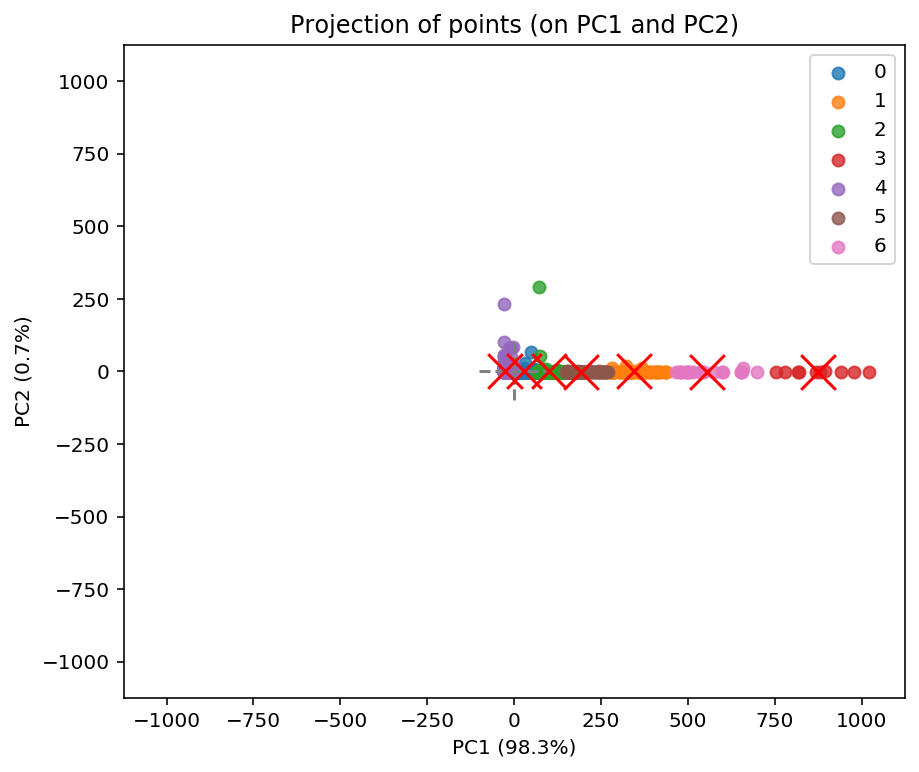

Number of clusters: 6 Silhouette Coefficient: 0.904 Calinski Harabaz Index: 13041


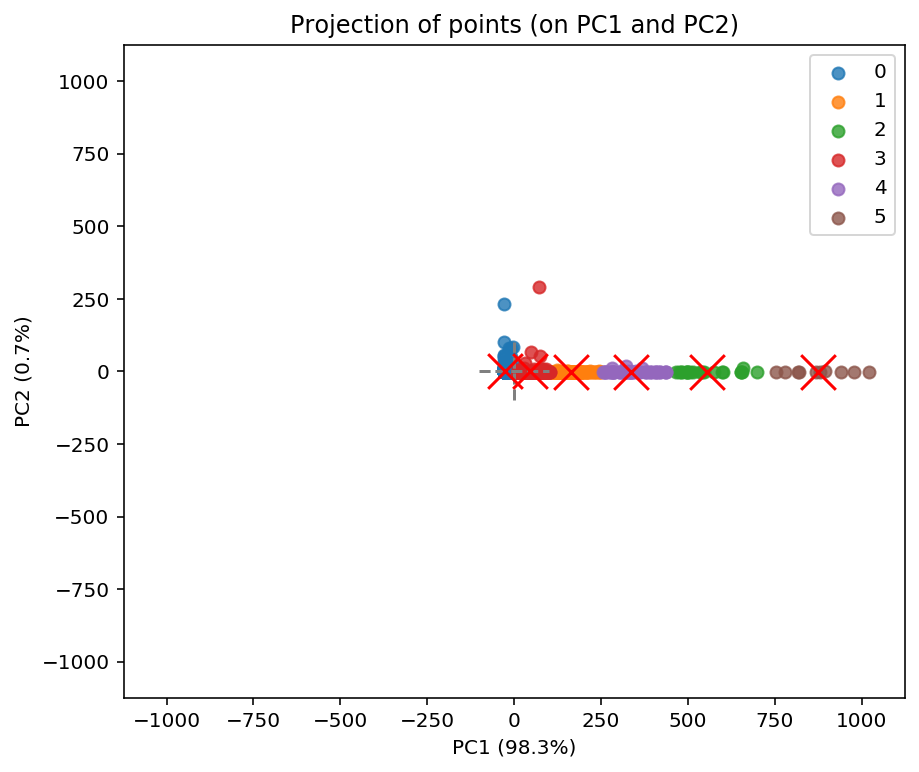

Number of clusters: 5 Silhouette Coefficient: 0.905 Calinski Harabaz Index: 11700


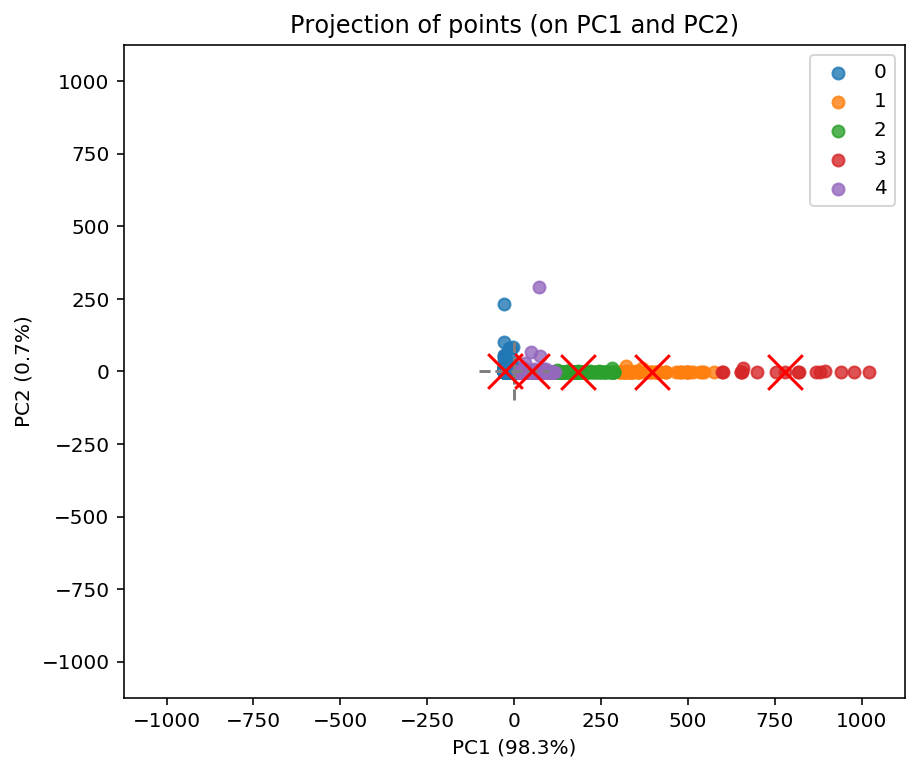

Number of clusters: 4 Silhouette Coefficient: 0.932 Calinski Harabaz Index: 10629


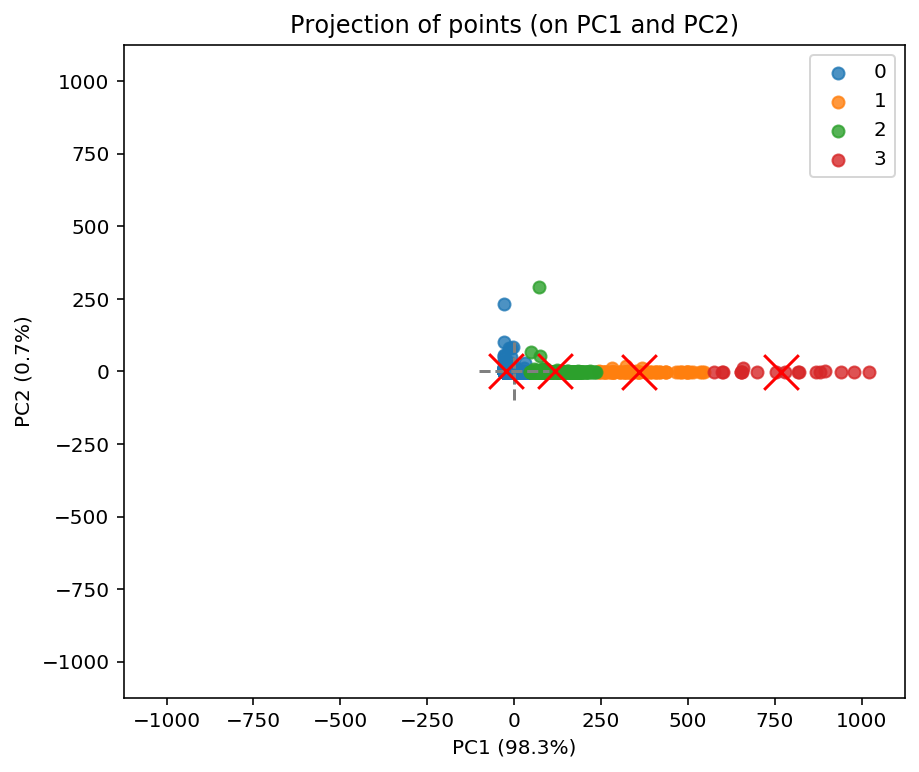

Number of clusters: 3 Silhouette Coefficient: 0.947 Calinski Harabaz Index: 8365


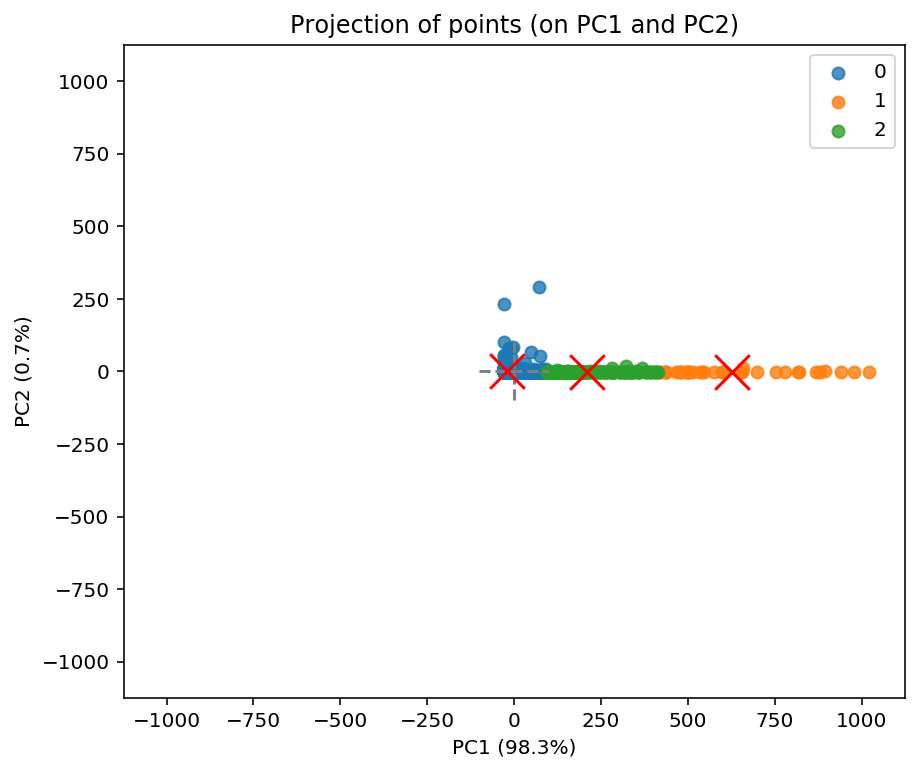

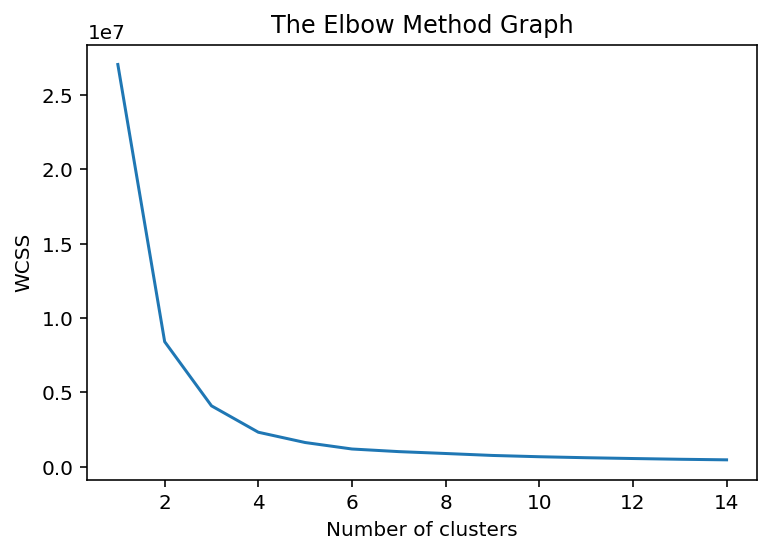

In [34]:
from draw_and_create_clusters import draw_clusters, draw_pca, create_kmeans_clusters
n_components = 2
axis_ranks=  [(0,1)]
alpha = 0.8


for n_clu in range(10, 2, -1):
    kmeans, data = create_kmeans_clusters(data, X, n_clu, silhouette_print=0)
    display_factorial_planes(data, X, n_components, axis_ranks, labels=None, alpha=alpha)
draw_clusters(X, 15)

In [37]:
kmeans, data = create_kmeans_clusters(data, X, n_clusters=6, silhouette_print=0)

Number of clusters: 6 Silhouette Coefficient: 0.904 Calinski Harabaz Index: 13041


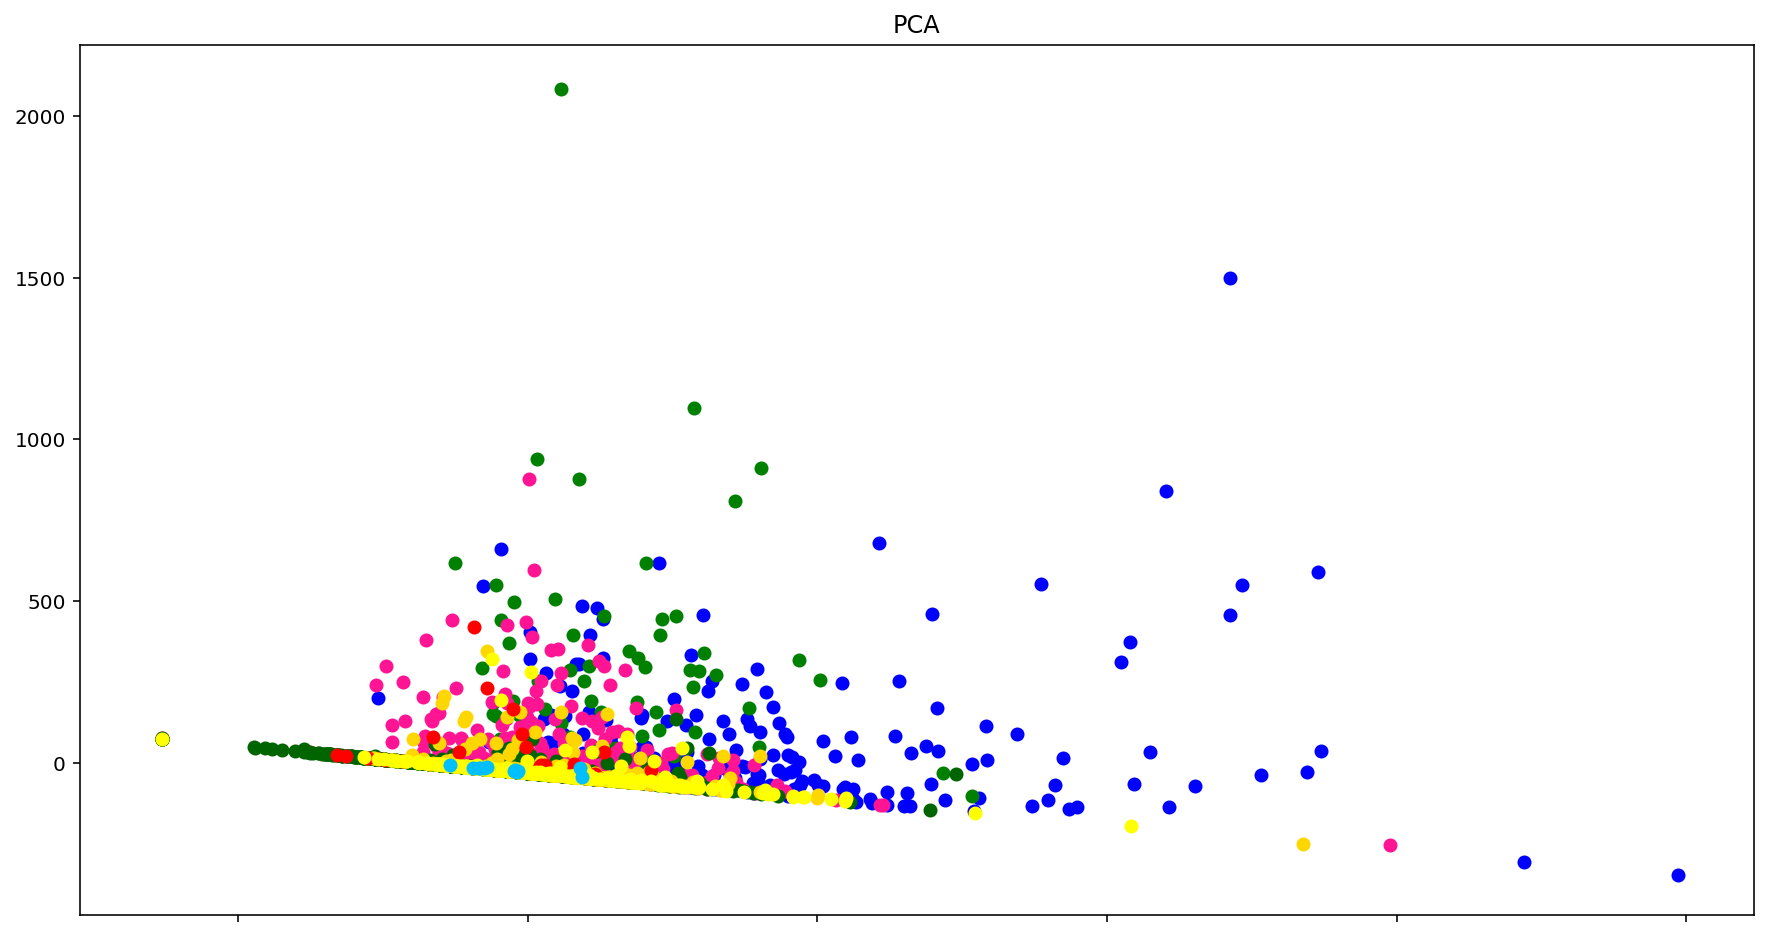

In [10]:
from draw_and_create_clusters import draw_pca, drawTSNE
#drawTSNE(X, data, 1)
draw_pca(X, data, 1)

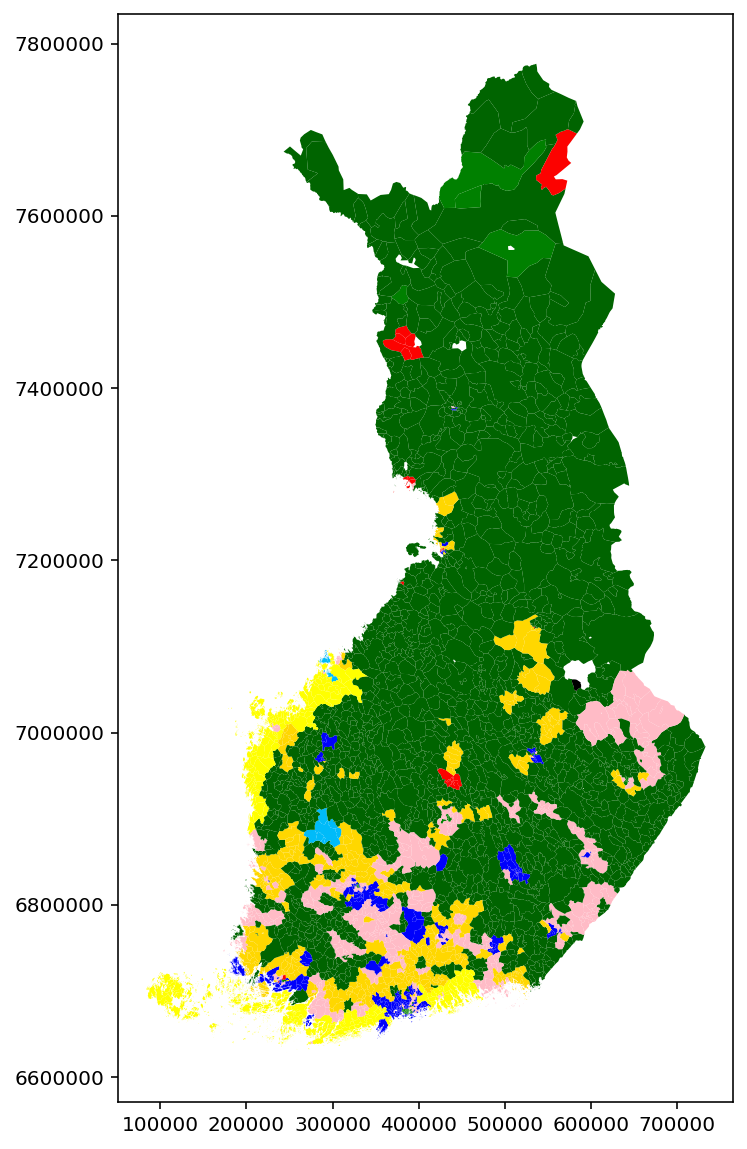

In [11]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('my cmap', ['black', 'black', 'deepskyblue', 'darkgreen', 'blue', 'gold',  'yellow', 'pink',  'red', 'green'])
data.plot(column='Suurin_puolue numero',cmap=cmap, figsize=(10, 10))

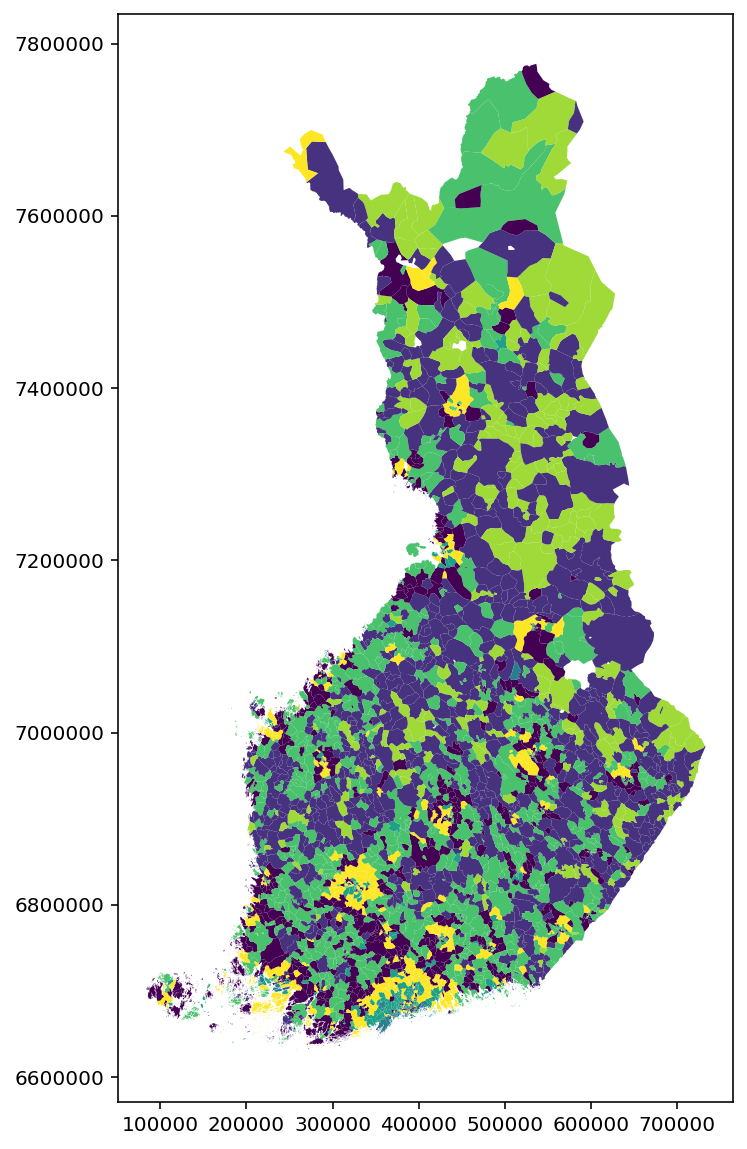

In [75]:
data.plot(column='cluster', figsize=(10, 10))

In [13]:
# Library of Functions for the OpenClassrooms Multivariate Exploratory Data Analysis Course

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns


palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''
    
    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n

def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    #plt.show()

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)        


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

Number of clusters: 6 Silhouette Coefficient: 0.229 Calinski Harabaz Index: 362
0 A Maatalous, metsätalous ja kalatalous, 2017 (TP) osuudesta asukkaat
1 Alemman korkeakoulututkinnon suorittaneet, 2018 (KO) osuudesta asukkaat
2 Alkutuotannon työpaikat, 2017 (TP) osuudesta asukkaat
3 Ammatillisen tutkinnon suorittaneet, 2018 (KO) osuudesta asukkaat
4 Asumisväljyys, 2018 (TE) osuudesta asukkaat
5 B Kaivostoiminta ja louhinta, 2017 (TP) osuudesta asukkaat
6 C Teollisuus, 2017 (TP) osuudesta asukkaat
7 D Sähkö-, kaasu- ja lämpöhuolto, jäähdytysliiketoiminta, 2017 (TP) osuudesta asukkaat
8 E Vesihuolto, viemäri- ja jätevesihuolto ja muu ympäristön puhtaanapito, 2017 (TP) osuudesta asukkaat
9 Eläkeläiset, 2017 (PT) osuudesta asukkaat
10 F Rakentaminen, 2017 (TP) osuudesta asukkaat
11 G Tukku- ja vähittäiskauppa; moottoriajoneuvojen ja moottoripyörien korjaus, 2017 (TP) osuudesta asukkaat
12 H Kuljetus ja varastointi, 2017 (TP) osuudesta asukkaat
13 I Majoitus- ja ravitsemistoiminta, 2017 (TP)

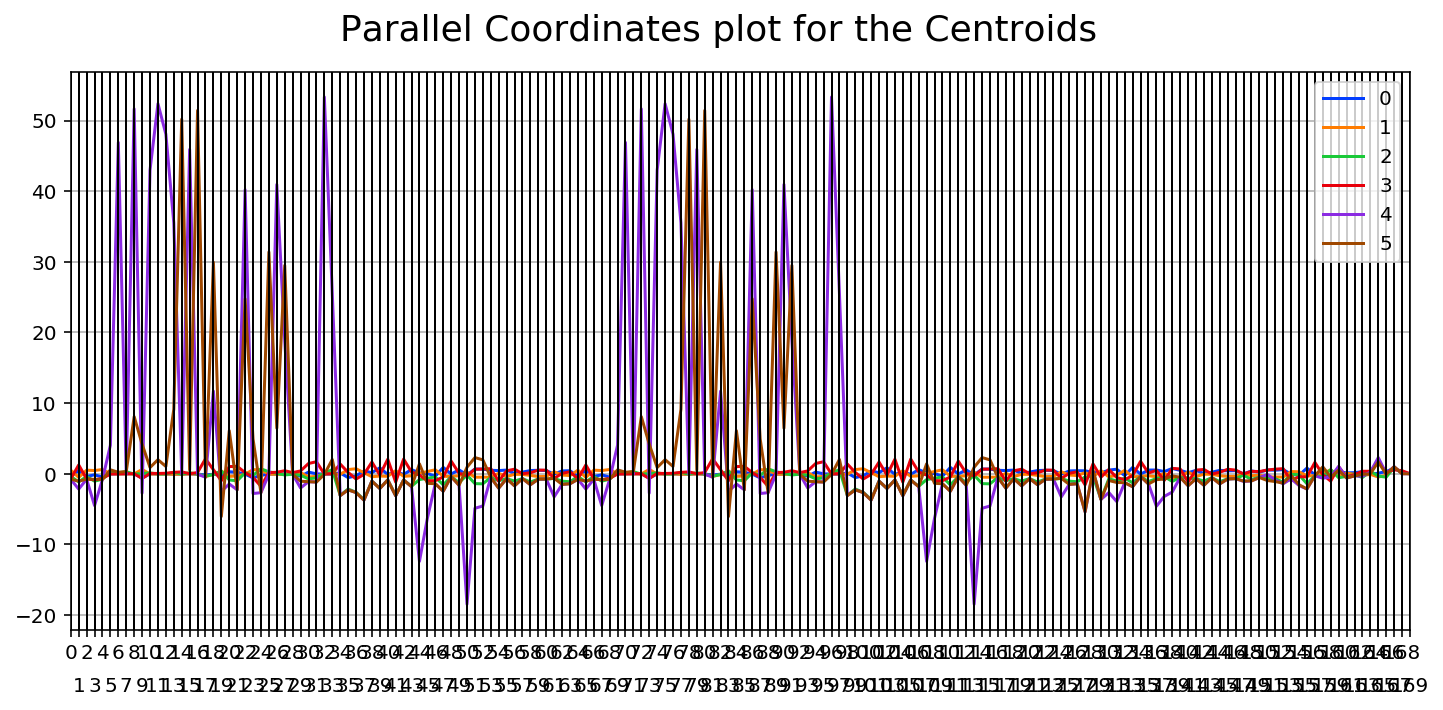

In [151]:
# Create a data frame containing our centroids
kmeans, data = create_kmeans_clusters(data, X_scale, n_clusters=6, silhouette_print=0)
labels = [X.columns.get_loc(c) for c in X.columns]
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=labels)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 6)

for c in X.columns:
    print(X.columns.get_loc(c), c)

In [21]:

# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 10

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

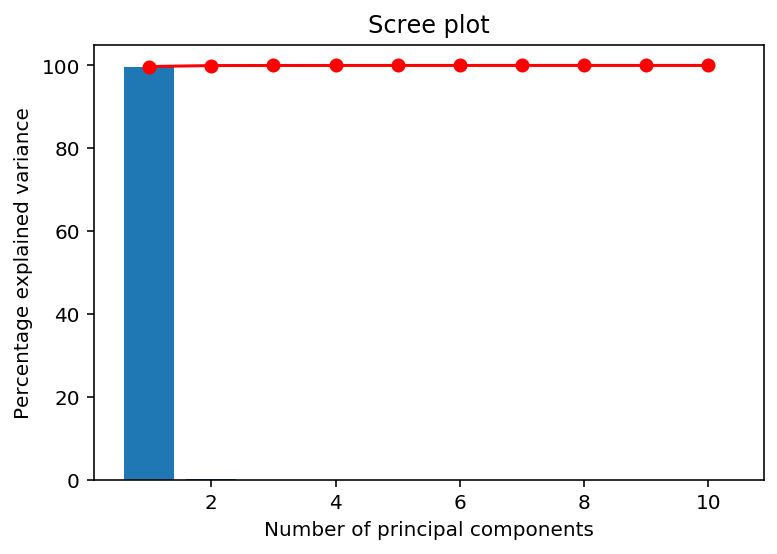

In [22]:
display_scree_plot(pca)

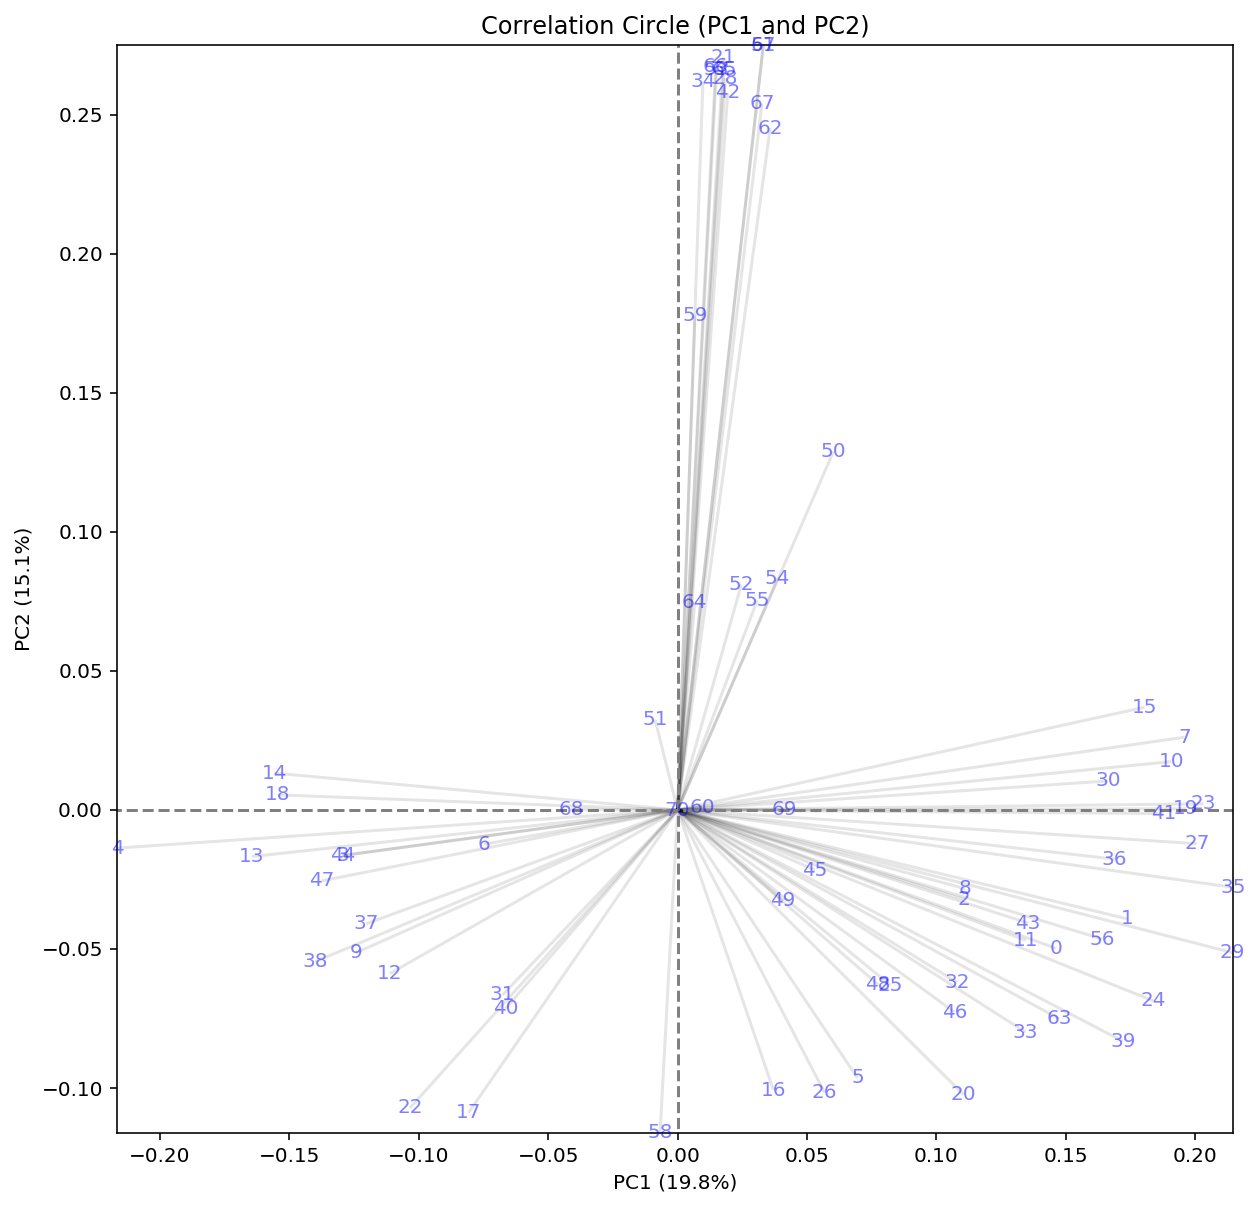

0 Aikuisten taloudet, 2018 (TE) osuudesta taloudet
1 4.1.C Autoetu Yhteensä Saajien lukumäärä osuudesta verotetut osuus total
2 4.2.10 Muut veronalaiset sosiaalietuudet Yhteensä Saajien lukumäärä osuudesta verotetut
3 Alkutuotannon työpaikat, 2017 (TP) osuudesta asukkaat
4 Pientaloasunnot, 2018 (RA) osuudesta asukkaat osuus total
5 Asuntolainan korkomenot vs tulot yhteensä
6 Alimpaan tuloluokkaan kuuluvat taloudet, 2017 (TR) osuudesta taloudet osuus total
7 Vuokra-asunnoissa asuvat taloudet, 2018 (TE) osuudesta taloudet
8 4.2.9 Kuntoutusraha ja -avustus Yhteensä Summa, euroa osuus total
9 Eläkeläisten taloudet, 2018 (TE) osuudesta taloudet osuus total
10 Nuorten yksinasuvien taloudet, 2018 (TE) osuudesta taloudet osuus total
11 4.2.8 Lapsen kotihoidon tuki Yhteensä Saajien lukumäärä osuudesta verotetut
12 4.2 Työmatkakulujen perusteella palkkatulosta vähennettävä määrä (TVL 93 §) Yhteensä Summa, euroa osuus total
13 Miehet, 2018 (HE) osuudesta asukkaat osuus total
14 Perusasteen suorit

In [24]:
pca = PCA(n_components=2)
pca.fit(X_scale)
pcs = pca.components_ 
labels = [X.columns.get_loc(c) for c in X.columns]
display_circles(pcs, num_components, pca, [(0,1)], labels = labels)
for c in X.columns:
    print(X.columns.get_loc(c), c)
    

In [18]:

pca = PCA(n_components=2)
pca.fit(X)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X)
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = data['cluster']


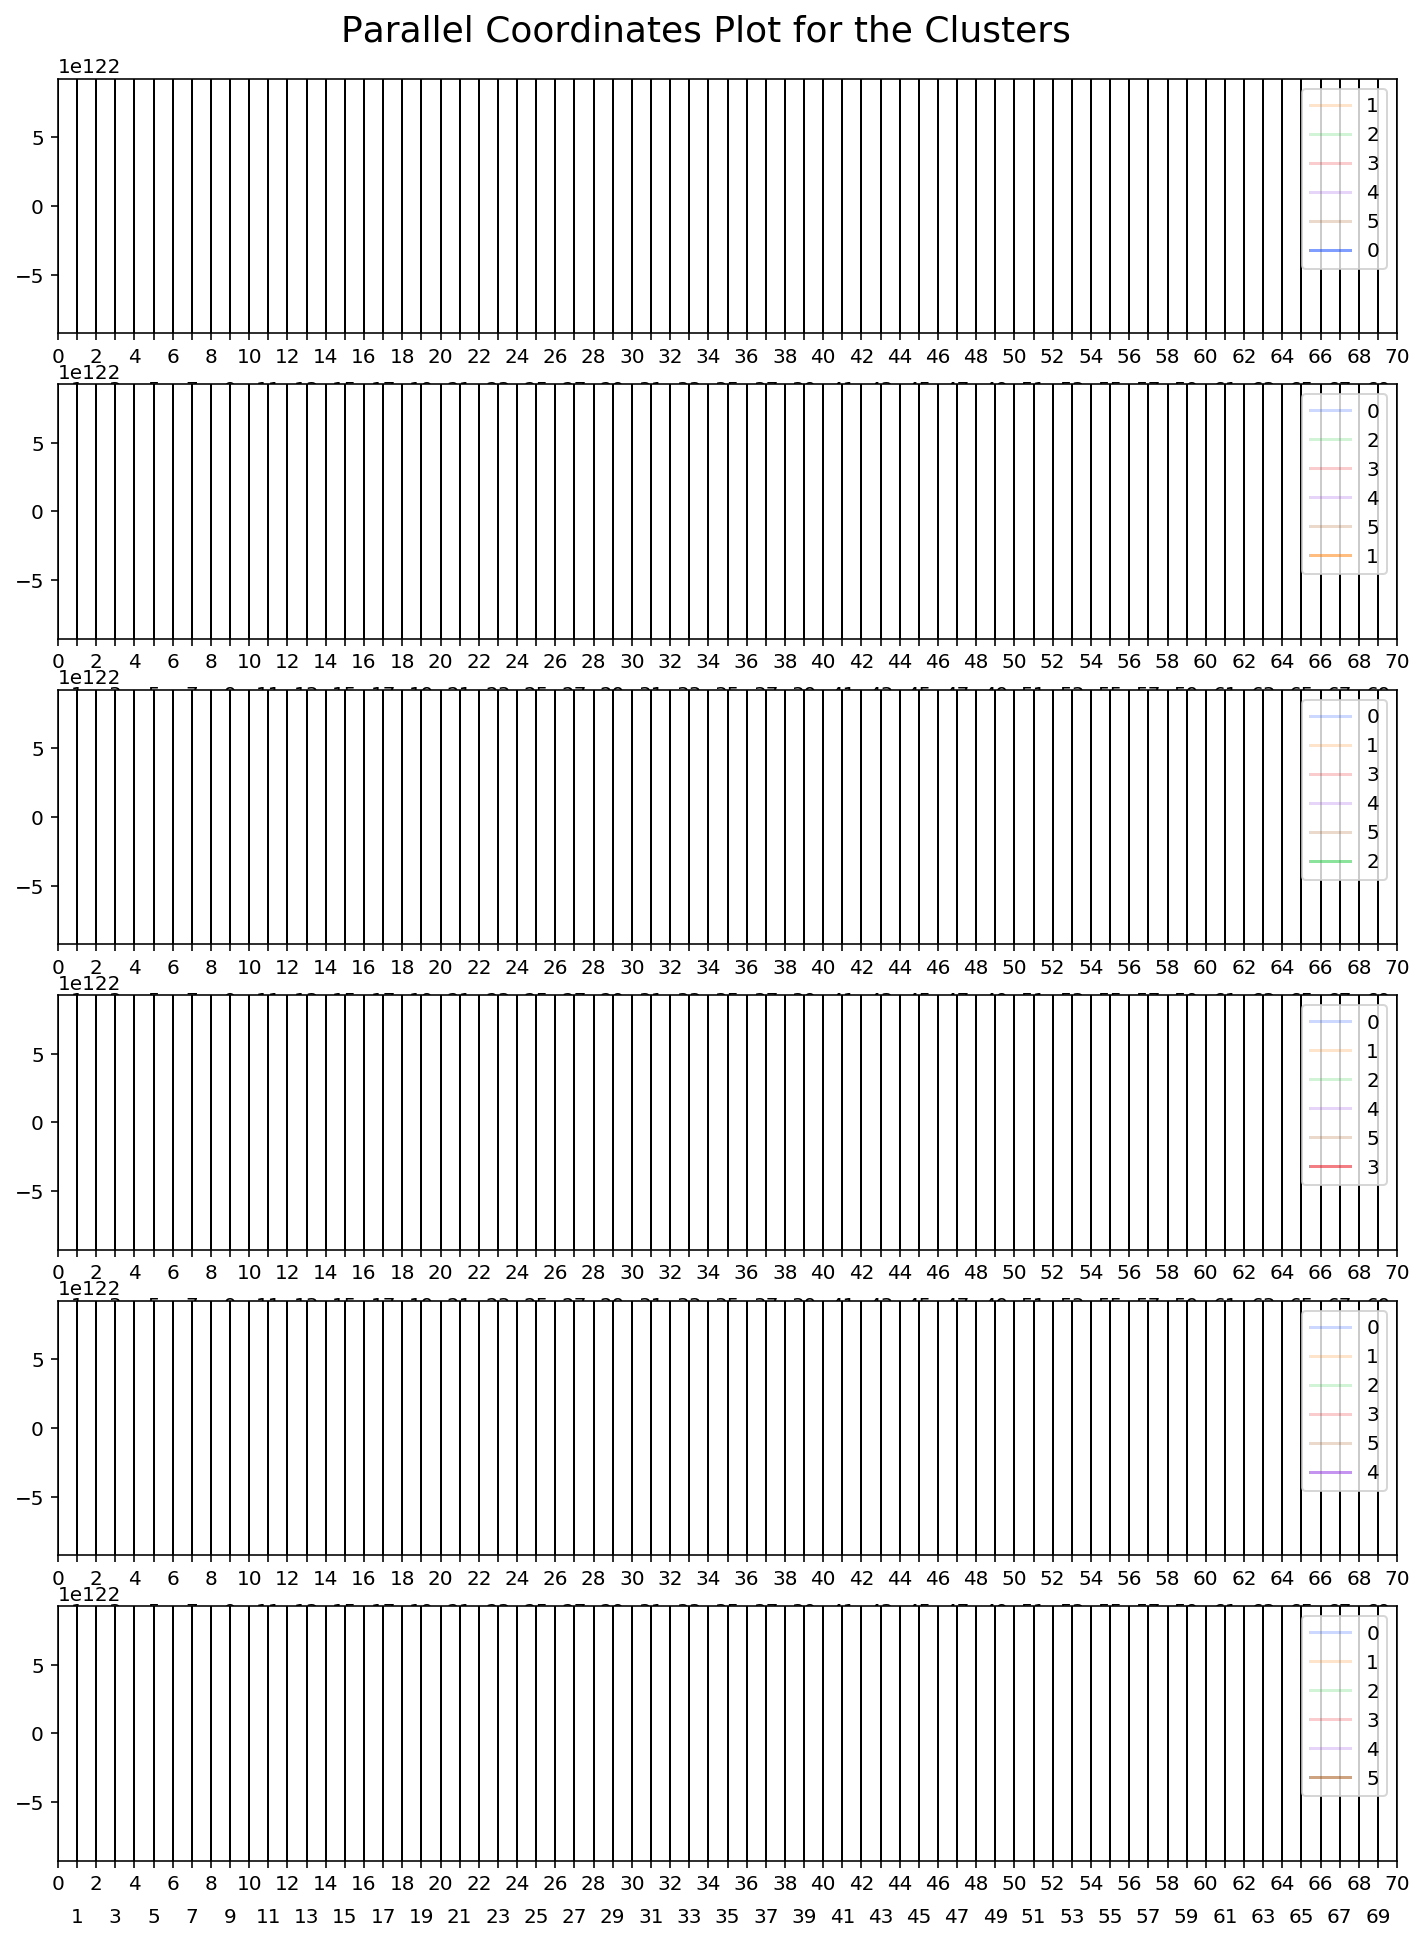

In [25]:
# Add the cluster number to the original scaled data
labels = [X.columns.get_loc(c) for c in X.columns]

X_clustered = pd.DataFrame(X, index=X.index, columns=labels)
X_clustered["cluster"] = data['cluster']


# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 6)